In [6]:
#Thư viện
from datetime import datetime
import pandas as pd 
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#Hiển thị tổng số cột có trong tập dữ liệu
pd.set_option('display.max_columns', None)

In [7]:
#Data CUSTOMER
df_customer = pd.read_csv("CUSTOMER.csv")
df_customer.head()


,Customer_ID,Age,Gender,City,Country
0,12395,60,Nữ,Hồ Chí Minh,Việt Nam
1,12395,60,Nữ,Hồ Chí Minh,Việt Nam
2,12395,60,Nữ,Hồ Chí Minh,Việt Nam
3,12395,60,Nữ,Hồ Chí Minh,Việt Nam
4,12395,60,Nữ,Hồ Chí Minh,Việt Nam


In [8]:
#Check giá trị NULL
df_customer.isnull().sum()

Customer_ID    0
Age            0
Gender         0
City           0
Country        0
dtype: int64

In [9]:
#Check giá trị bị trùng lắp
df_customer.duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
121941     True
121942    False
121943     True
121944    False
121945    False
Length: 121946, dtype: bool

In [10]:
#Đếm các giá trị trùng lắp
df_customer.duplicated().sum()

np.int64(103773)

In [11]:
df_customer = df_customer.drop_duplicates()
df_customer.reset_index(drop=True, inplace=True)
df_customer.head()

,Customer_ID,Age,Gender,City,Country
0,12395,60,Nữ,Hồ Chí Minh,Việt Nam
1,15481,63,Nữ,Nha Trang,Việt Nam
2,13481,45,Nam,Đồng Hới,Việt Nam
3,17823,53,Nữ,Bến Tre,Việt Nam
4,12491,60,Nữ,Bà Rịa,Việt Nam


In [12]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18173 entries, 0 to 18172
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  18173 non-null  int64 
 1   Age          18173 non-null  int64 
 2   Gender       18173 non-null  object
 3   City         18173 non-null  object
 4   Country      18173 non-null  object
dtypes: int64(2), object(3)
memory usage: 710.0+ KB


In [13]:
#Data ORDERS
df_orders = pd.read_csv("ORDERS.csv")
df_orders.head()

,Order_ID,Employee_No,Product_ID,Customer_ID,Order_Date,Ship_Date,Revenue,Product_name
0,0,6488,THMOS453,695,8/9/2022,8/10/2022,672545,Áo sơ mi nam màu xanh ngắn tay công sở sợi bamboo
1,1,6075,THMTS044,3838,1/27/2023,1/28/2023,426109,Áo thun nam ngắn taycao cấp chất cotton
2,2,6111,THMOS449,15124,2/11/2023,2/12/2023,687273,Áo sơ mi nam caro cao cấp ngắn tay nano
3,3,6188,THMCS218,5601,4/19/2022,4/20/2022,436419,Áo sơ mi casual họa tiết cao cấp
4,4,6536,THMOL463,7044,7/6/2022,7/7/2022,756000,Áo sơ mi nam vãi vỏ hàu


In [14]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Order_ID      142704 non-null  int64 
 1   Employee_No   142704 non-null  int64 
 2   Product_ID    142704 non-null  object
 3   Customer_ID   142704 non-null  int64 
 4   Order_Date    142704 non-null  object
 5   Ship_Date     142704 non-null  object
 6   Revenue       142704 non-null  int64 
 7   Product_name  142704 non-null  object
dtypes: int64(4), object(4)
memory usage: 8.7+ MB


In [15]:
#bỏ cột employee
df_orders.drop(columns=['Employee_No'], inplace=True)
df_orders.head()

,Order_ID,Product_ID,Customer_ID,Order_Date,Ship_Date,Revenue,Product_name
0,0,THMOS453,695,8/9/2022,8/10/2022,672545,Áo sơ mi nam màu xanh ngắn tay công sở sợi bamboo
1,1,THMTS044,3838,1/27/2023,1/28/2023,426109,Áo thun nam ngắn taycao cấp chất cotton
2,2,THMOS449,15124,2/11/2023,2/12/2023,687273,Áo sơ mi nam caro cao cấp ngắn tay nano
3,3,THMCS218,5601,4/19/2022,4/20/2022,436419,Áo sơ mi casual họa tiết cao cấp
4,4,THMOL463,7044,7/6/2022,7/7/2022,756000,Áo sơ mi nam vãi vỏ hàu


In [16]:
df_orders['Order_Date'] = pd.to_datetime(df_orders['Order_Date'])
df_orders['Ship_Date'] = pd.to_datetime(df_orders['Ship_Date'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order_ID      142704 non-null  int64         
 1   Product_ID    142704 non-null  object        
 2   Customer_ID   142704 non-null  int64         
 3   Order_Date    142704 non-null  datetime64[ns]
 4   Ship_Date     142704 non-null  datetime64[ns]
 5   Revenue       142704 non-null  int64         
 6   Product_name  142704 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 7.6+ MB


In [17]:
#Data PRODUCT
df_product = pd.read_csv("PRODUCT.csv")
df_product.head()

,Product_group,Product_ID,Product_category,Product_name,Product_Price
0,ÁO NAM,THMOL415,Áo sơ mi nam công sở,Áo sơ mi bamboo cao cấp,"501,709"
1,ÁO NAM,THMOL435,Áo sơ mi nam công sở,Áo sơ mi caro dài tay,"515,455"
2,ÁO NAM,THMOL436,Áo sơ mi nam công sở,Áo sơ mi caro nam cao cấp,"736,364"
3,ÁO NAM,THMOL423,Áo sơ mi nam công sở,Áo sơ mi caro nam dài tay cao cấp,"515,455"
4,ÁO NAM,THMOL456,Áo sơ mi nam công sở,Áo sơ mi caro nam dài tay cao cấp,"736,364"


In [18]:
df_product.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
208    False
209    False
210    False
211    False
212    False
Length: 213, dtype: bool

In [19]:
df_product.duplicated().sum()

np.int64(0)

In [20]:
df_product = df_product.drop_duplicates()
df_product =df_product.drop_duplicates(subset='Product_ID', keep='first')
df_product.head()

,Product_group,Product_ID,Product_category,Product_name,Product_Price
0,ÁO NAM,THMOL415,Áo sơ mi nam công sở,Áo sơ mi bamboo cao cấp,"501,709"
1,ÁO NAM,THMOL435,Áo sơ mi nam công sở,Áo sơ mi caro dài tay,"515,455"
2,ÁO NAM,THMOL436,Áo sơ mi nam công sở,Áo sơ mi caro nam cao cấp,"736,364"
3,ÁO NAM,THMOL423,Áo sơ mi nam công sở,Áo sơ mi caro nam dài tay cao cấp,"515,455"
4,ÁO NAM,THMOL456,Áo sơ mi nam công sở,Áo sơ mi caro nam dài tay cao cấp,"736,364"


In [21]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 212
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_group     195 non-null    object
 1   Product_ID        195 non-null    object
 2   Product_category  195 non-null    object
 3   Product_name      195 non-null    object
 4   Product_Price     195 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [22]:
#Gộp data
merged_orders_product = pd.merge(df_orders, df_product, on='Product_ID', how='left')

In [23]:
merged_orders_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          142704 non-null  int64         
 1   Product_ID        142704 non-null  object        
 2   Customer_ID       142704 non-null  int64         
 3   Order_Date        142704 non-null  datetime64[ns]
 4   Ship_Date         142704 non-null  datetime64[ns]
 5   Revenue           142704 non-null  int64         
 6   Product_name_x    142704 non-null  object        
 7   Product_group     142704 non-null  object        
 8   Product_category  142704 non-null  object        
 9   Product_name_y    142704 non-null  object        
 10  Product_Price     142704 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 12.0+ MB


In [24]:
final_df = pd.merge(merged_orders_product, df_customer, on = 'Customer_ID', how = 'left')

In [25]:
final_df.to_csv('Final.csv', encoding='utf-8', index=False, header = True)

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          142704 non-null  int64         
 1   Product_ID        142704 non-null  object        
 2   Customer_ID       142704 non-null  int64         
 3   Order_Date        142704 non-null  datetime64[ns]
 4   Ship_Date         142704 non-null  datetime64[ns]
 5   Revenue           142704 non-null  int64         
 6   Product_name_x    142704 non-null  object        
 7   Product_group     142704 non-null  object        
 8   Product_category  142704 non-null  object        
 9   Product_name_y    142704 non-null  object        
 10  Product_Price     142704 non-null  object        
 11  Age               142687 non-null  float64       
 12  Gender            142687 non-null  object        
 13  City              142687 non-null  object        
 14  Coun

In [27]:
final_df.head()

,Order_ID,Product_ID,Customer_ID,Order_Date,Ship_Date,Revenue,Product_name_x,Product_group,Product_category,Product_name_y,Product_Price,Age,Gender,City,Country
0,0,THMOS453,695,2022-08-09,2022-08-10,672545,Áo sơ mi nam màu xanh ngắn tay công sở sợi bamboo,ÁO NAM,Áo sơ mi nam công sở,Áo sơ mi nam màu xanh ngắn tay công sở sợi bamboo,"672,545",28.0,Nữ,Biên Hòa,Việt Nam
1,1,THMTS044,3838,2023-01-27,2023-01-28,426109,Áo thun nam ngắn taycao cấp chất cotton,ÁO NAM,Áo thun nam cao cấp,Áo thun nam ngắn taycao cấp chất cotton,"426,109",45.0,Nữ,Bà Rịa,Việt Nam
2,2,THMOS449,15124,2023-02-11,2023-02-12,687273,Áo sơ mi nam caro cao cấp ngắn tay nano,ÁO NAM,Áo sơ mi nam công sở,Áo sơ mi nam caro cao cấp ngắn tay nano,"687,273",47.0,Nữ,Bến Tre,Việt Nam
3,3,THMCS218,5601,2022-04-19,2022-04-20,436419,Áo sơ mi casual họa tiết cao cấp,ÁO NAM,Áo sơ mi nam công sở,Áo sơ mi nam họa tiết cao cấp,"436,419",48.0,Nữ,Hồ Chí Minh,Việt Nam
4,4,THMOL463,7044,2022-07-06,2022-07-07,756000,Áo sơ mi nam vãi vỏ hàu,ÁO NAM,Áo sơ mi nam công sở,Áo sơ mi nam vãi vỏ hàu,"756,000",33.0,Nam,Bắc Ninh,Việt Nam


In [28]:
#Số lượng dòng, cột
final_df.shape

(142704, 15)

In [29]:
#Thông số thống kê
final_df.describe()

,Order_ID,Customer_ID,Order_Date,Ship_Date,Revenue,Age
count,142704.000000,142704.000000,142704,142704,1.427040e+05,142687.000000
mean,71351.500000,9175.360522,2022-08-06 01:13:30.090817280,2022-08-07 01:13:30.090817280,6.699770e+05,49.655372
min,0.000000,1.000000,2022-01-01 00:00:00,2022-01-02 00:00:00,6.676400e+04,28.000000
25%,35675.750000,4584.000000,2022-03-16 00:00:00,2022-03-17 00:00:00,4.845270e+05,43.000000
50%,71351.500000,9152.000000,2022-07-01 00:00:00,2022-07-02 00:00:00,6.185450e+05,50.000000
75%,107027.250000,13765.000000,2023-01-17 00:00:00,2023-01-18 00:00:00,7.363640e+05,55.000000
max,142703.000000,18373.000000,2023-06-29 00:00:00,2023-06-30 00:00:00,4.270909e+06,74.000000
std,41195.240745,5305.186519,NaN,NaN,3.939819e+05,9.624360


In [30]:
final_df.describe(include=object).T

,count,unique,top,freq
Product_ID,142704,195,THMCS233,2400
Product_name_x,142704,181,Áo sơ mi nam casual ngắn tay,4710
Product_group,142704,5,ÁO NAM,103199
Product_category,142704,18,Áo sơ mi nam công sở,85384
Product_name_y,142704,169,Áo sơ mi nam casual ngắn tay,4710
Product_Price,142704,66,"672,545",13592
Gender,142687,2,Nam,71750
City,142687,29,Hải Phòng,8667
Country,142687,1,Việt Nam,142687


In [31]:
#EDA
#Phân tích tổng quan

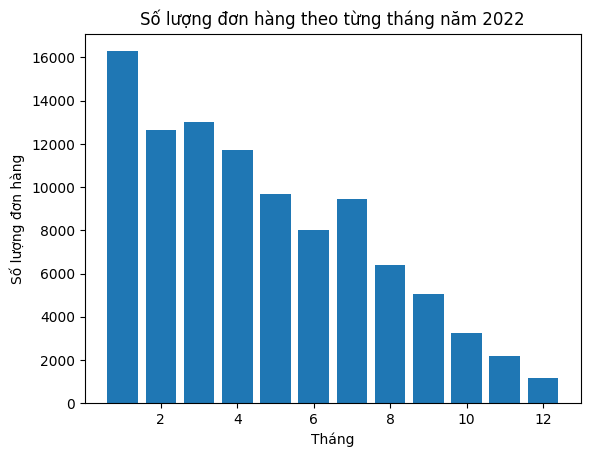

In [32]:
#Số lượng đơn hàng theo từng tháng năm 2022
final_df['Month'] = final_df['Order_Date'].dt.month

df_2022 = final_df[final_df['Order_Date'].dt.year == 2022]

order_count_by_month = df_2022.groupby('Month').size()

plt.bar(order_count_by_month.index, order_count_by_month.values)

plt.xlabel('Tháng')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng theo từng tháng năm 2022')
plt.show()

In [33]:
print(final_df.columns)


Index(['Order_ID', 'Product_ID', 'Customer_ID', 'Order_Date', 'Ship_Date',
       'Revenue', 'Product_name_x', 'Product_group', 'Product_category',
       'Product_name_y', 'Product_Price', 'Age', 'Gender', 'City', 'Country',
       'Month'],
      dtype='object')


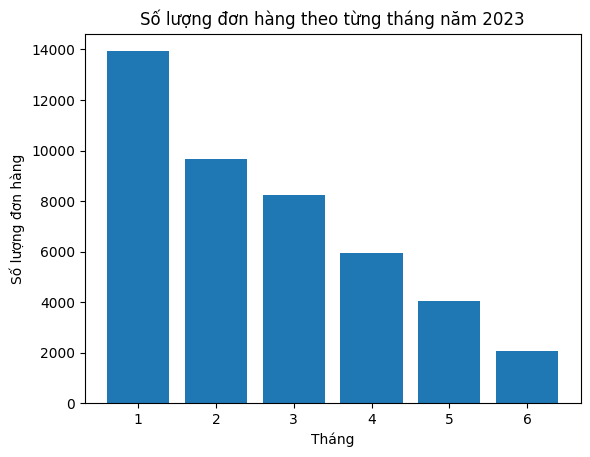

In [34]:
#Số lượng đơn hàng theo từng tháng năm 2023
final_df['Month'] = final_df['Order_Date'].dt.month

df_2023 = final_df[final_df['Order_Date'].dt.year == 2023]

order_count_by_month = df_2023.groupby('Month').size()

plt.bar(order_count_by_month.index, order_count_by_month.values)

plt.xlabel('Tháng')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng theo từng tháng năm 2023')
plt.show()

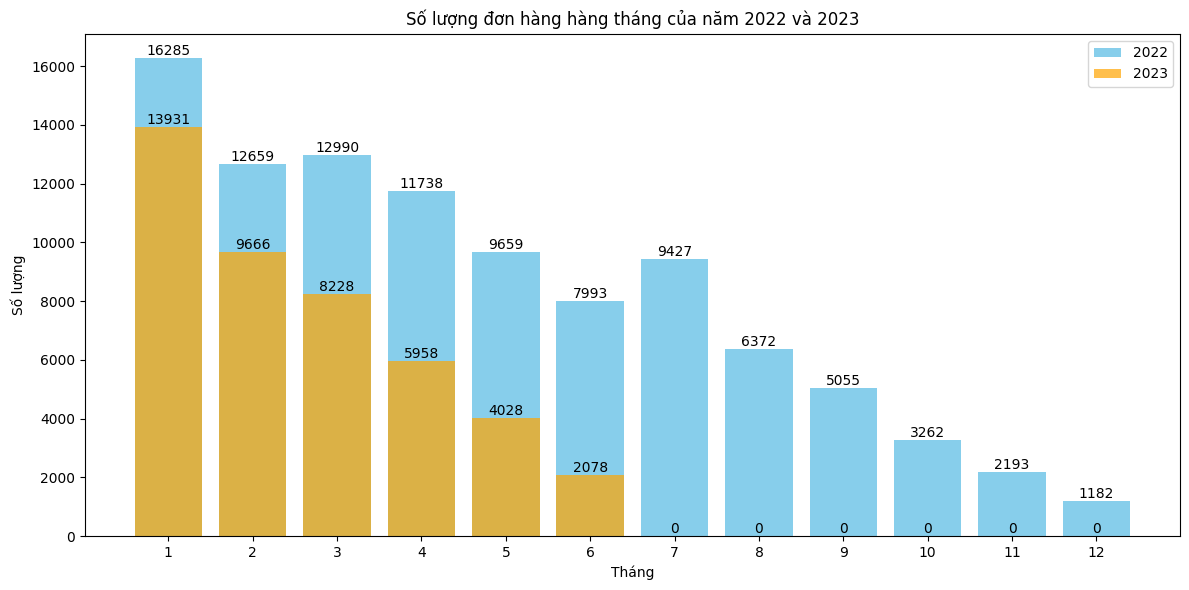

In [35]:
#Số lượng đơn hàng hàng tháng của năm 2022 và 2023
final_df['Year'] = final_df['Order_Date'].dt.year
data_2022 = final_df[final_df['Year'] == 2022]
data_2023 = final_df[final_df['Year'] == 2023]
order_count_by_month_2022 = data_2022.groupby('Month').size()
order_count_by_month_2023 = data_2023.groupby('Month').size()

months = range(1, 13)
order_count_2022 = order_count_by_month_2022.values
order_count_2023 = order_count_by_month_2023.values

if len(order_count_2023) < 12:
    order_count_2023_extended = np.zeros(12)
    order_count_2023_extended[:len(order_count_2023)] = order_count_2023
    order_count_2023 = order_count_2023_extended

plt.figure(figsize=(12, 6))
bars_2022 = plt.bar(months, order_count_2022, color='skyblue', label='2022')
bars_2023 = plt.bar(months, order_count_2023, color='orange', label='2023', alpha=0.7)

for bar, revenue in zip(bars_2022, order_count_2022):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')

for bar, revenue in zip(bars_2023, order_count_2023):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')

plt.title('Số lượng đơn hàng hàng tháng của năm 2022 và 2023')
plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.xticks(months)
plt.legend()
plt.tight_layout()
plt.show()

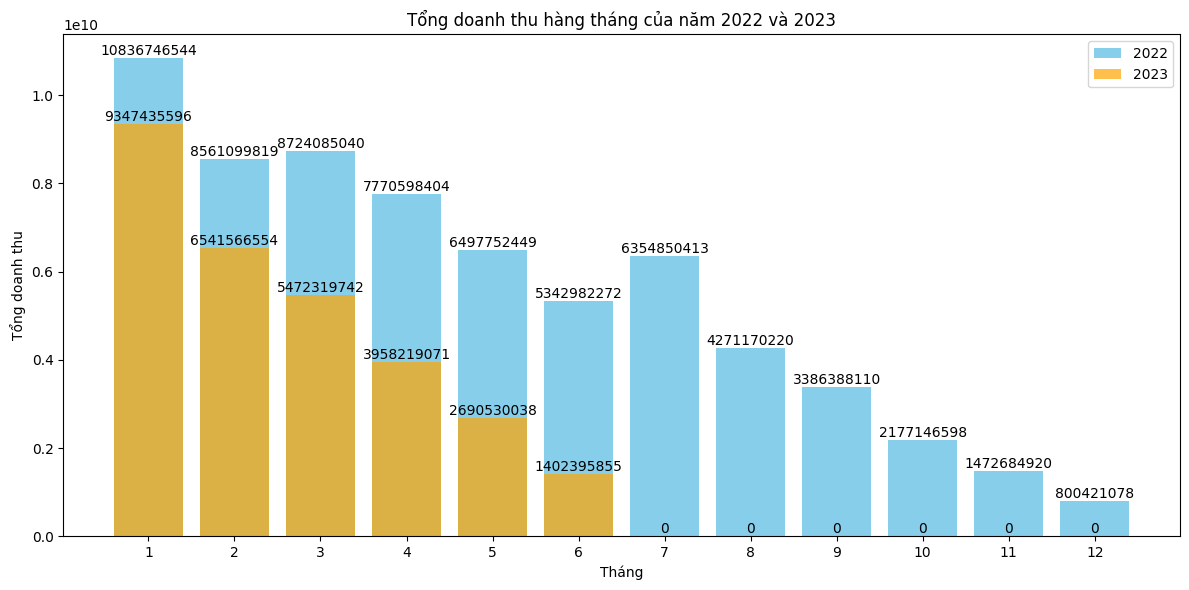

In [36]:
#Tổng doanh thu hàng tháng năm 2022 và 2023
final_df['Year'] = final_df['Order_Date'].dt.year
data_2022 = final_df[final_df['Year'] == 2022]
data_2023 = final_df[final_df['Year'] == 2023]

revenue_by_month_2022 = data_2022.groupby('Month')['Revenue'].sum()
revenue_by_month_2023 = data_2023.groupby('Month')['Revenue'].sum()

months = range(1,13)
revenue_2022 = revenue_by_month_2022.values
revenue_2023 = revenue_by_month_2023.values

if len(revenue_2023) < 12:
    revenue_2023_extended = np.zeros(12)
    revenue_2023_extended[:len(revenue_2023)] = revenue_2023
    revenue_2023 = revenue_2023_extended

plt.figure(figsize=(12,6))
bars_2022 = plt.bar(months, revenue_2022, color = 'skyblue', label = '2022')
bars_2023 = plt.bar(months, revenue_2023, color = 'orange', label = '2023', alpha = 0.7)

for bar, revenue in zip(bars_2022, revenue_2022):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')

for bar, revenue in zip(bars_2023, revenue_2023):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')


plt.title('Tổng doanh thu hàng tháng của năm 2022 và 2023')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu')
plt.xticks(months)
plt.legend() #Hiển thị chú thích
plt.tight_layout()
plt.show()



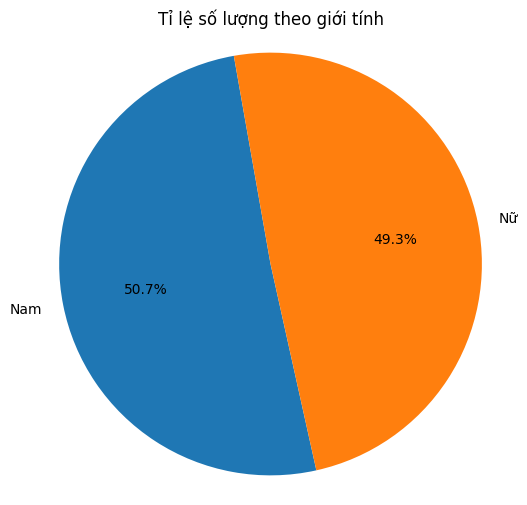

In [37]:
#Tỉ lệ số lượng theo giới tính
gender_counts = df_customer['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Tỉ lệ số lượng theo giới tính')
plt.axis('equal')
plt.show()


In [38]:
#Top 10 sản phẩm bán chạy nhất
product_counts = final_df['Product_name_x'].value_counts()
top_10_products = product_counts.head(10)
print("Top 10 sản phẩm bán chạy nhất:")
print(top_10_products)

Top 10 sản phẩm bán chạy nhất:
Product_name_x
Áo sơ mi nam casual ngắn tay                    4710
Áo sơ mi casual nam dài tay                     2864
Áo sơ mi nam dài tay cao cấp                    2843
Áo sơ mi nam casual nam ngắn tay cao cấp        2745
Áo sơ mi nam họa tiết cao cấp ngắn tay          2222
Áo sơ mi nam casual dài tay                     2192
Ví da nam cao cấp Merriman                      1768
Áo sơ mi nam màu xanh ngắn tay sợi bamboo       1761
Áo sơ mi nam Luxury dài tay họa tiết sọc dọc    1757
Áo sơ mi caro nam dài tay                       1756
Name: count, dtype: int64


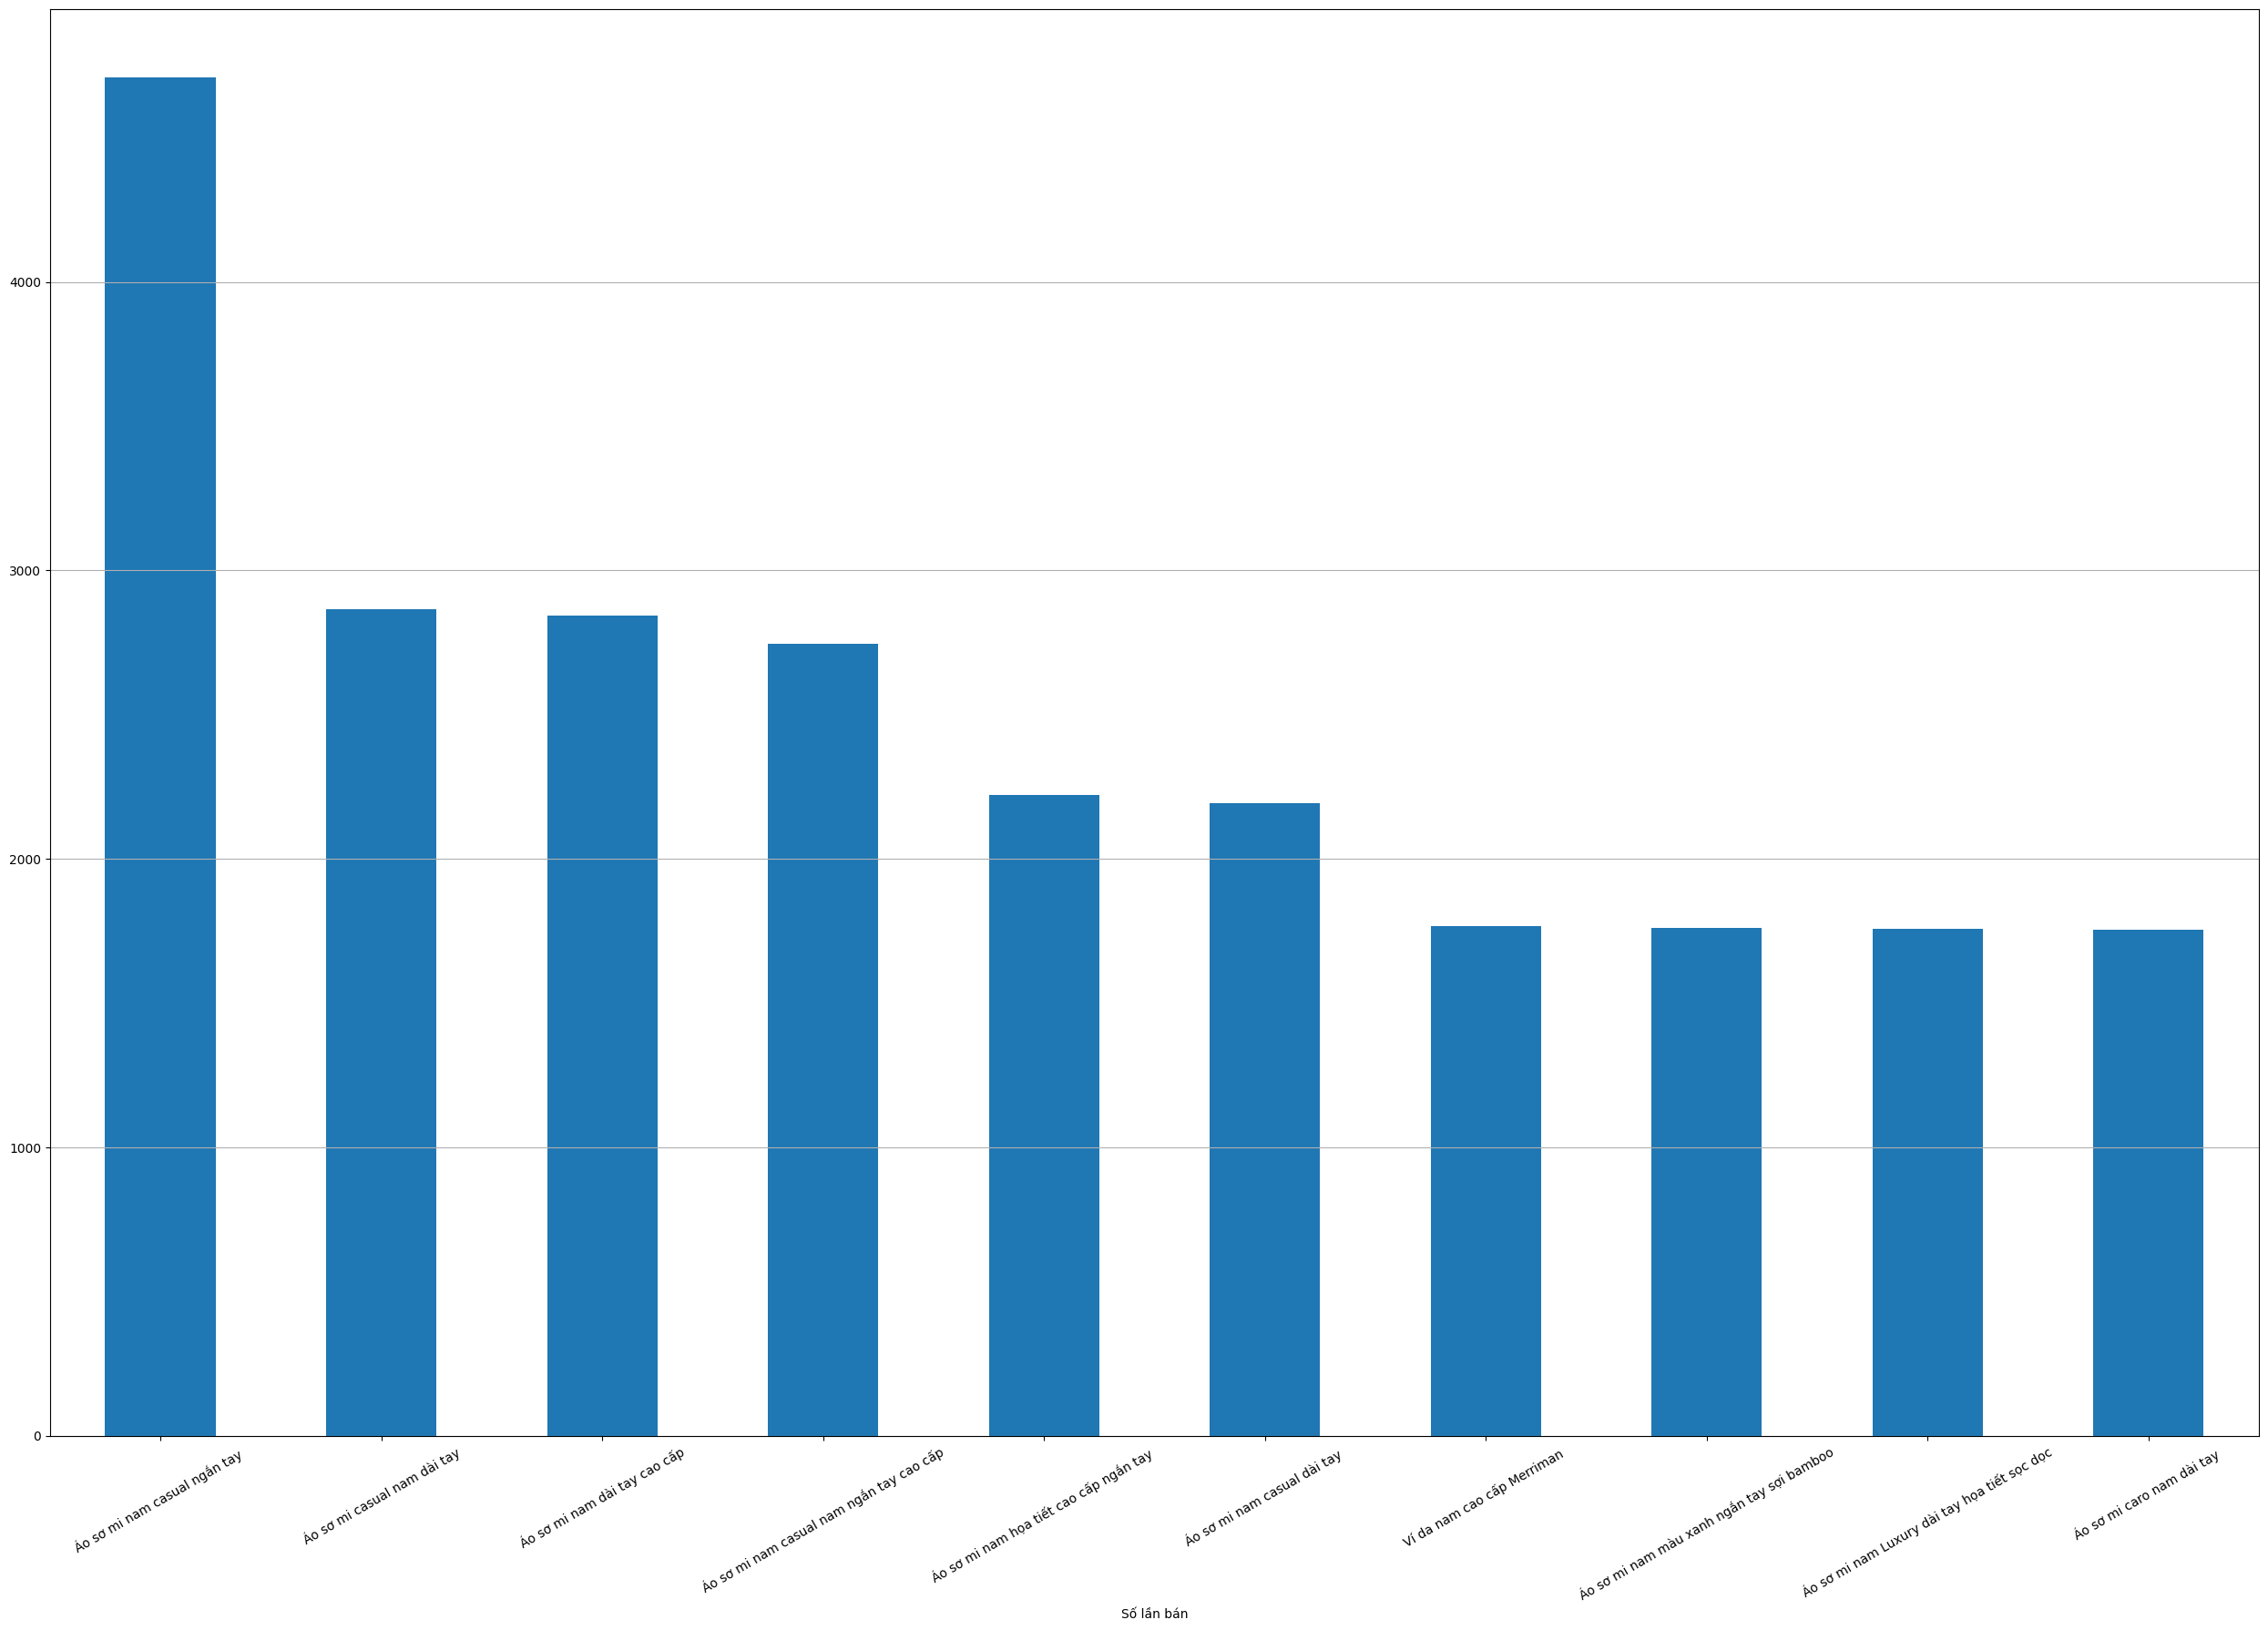

In [39]:
plt.figure(figsize=(25,18))
top_10_products.plot(kind='bar')
plt.xlabel('Tên sản phẩm')
plt.xlabel('Số lần bán')
plt.xticks(rotation=30) #xoay các nhãn trên trục x (tên sản phẩm) một góc 30 độ
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [40]:
#Top sản phẩm có doanh thu cao, thấp
product_revenue = final_df.groupby('Product_name_x')['Revenue'].sum()
top_5_high_revenue = product_revenue.sort_values(ascending=False).head(5)
top_5_low_revenue = product_revenue.sort_values().head(5)
print("Top 5 sản phẩm có tổng doanh thu cao nhất:")
print(top_5_high_revenue)

print("\nTop 5 sản phẩm có tổng doanh thu thấp nhất:")
print(top_5_low_revenue)

Top 5 sản phẩm có tổng doanh thu cao nhất:
Product_name_x
Áo sơ mi nam casual ngắn tay                3167686950
Vest bộ nam cao cấp Merriman màu Sand       2635150853
Áo sơ mi nam casual dài tay                 1657152000
Áo sơ mi nam casual nam ngắn tay cao cấp    1552377499
Áo vest blazer nam Merriman màu TAN         1550428110
Name: Revenue, dtype: int64

Top 5 sản phẩm có tổng doanh thu thấp nhất:
Product_name_x
Tất kháng khuẩn khử mùi cổ ngắn          39190468
Quần lót brief nam cao cấp Merriman      39834528
Tất kháng khuẩn khử mùi cổ trung         39858108
Quần underwear cao cấp kiểu boxer        44782839
Quần đùi mặc nhà cao cấp Merriman       134997380
Name: Revenue, dtype: int64


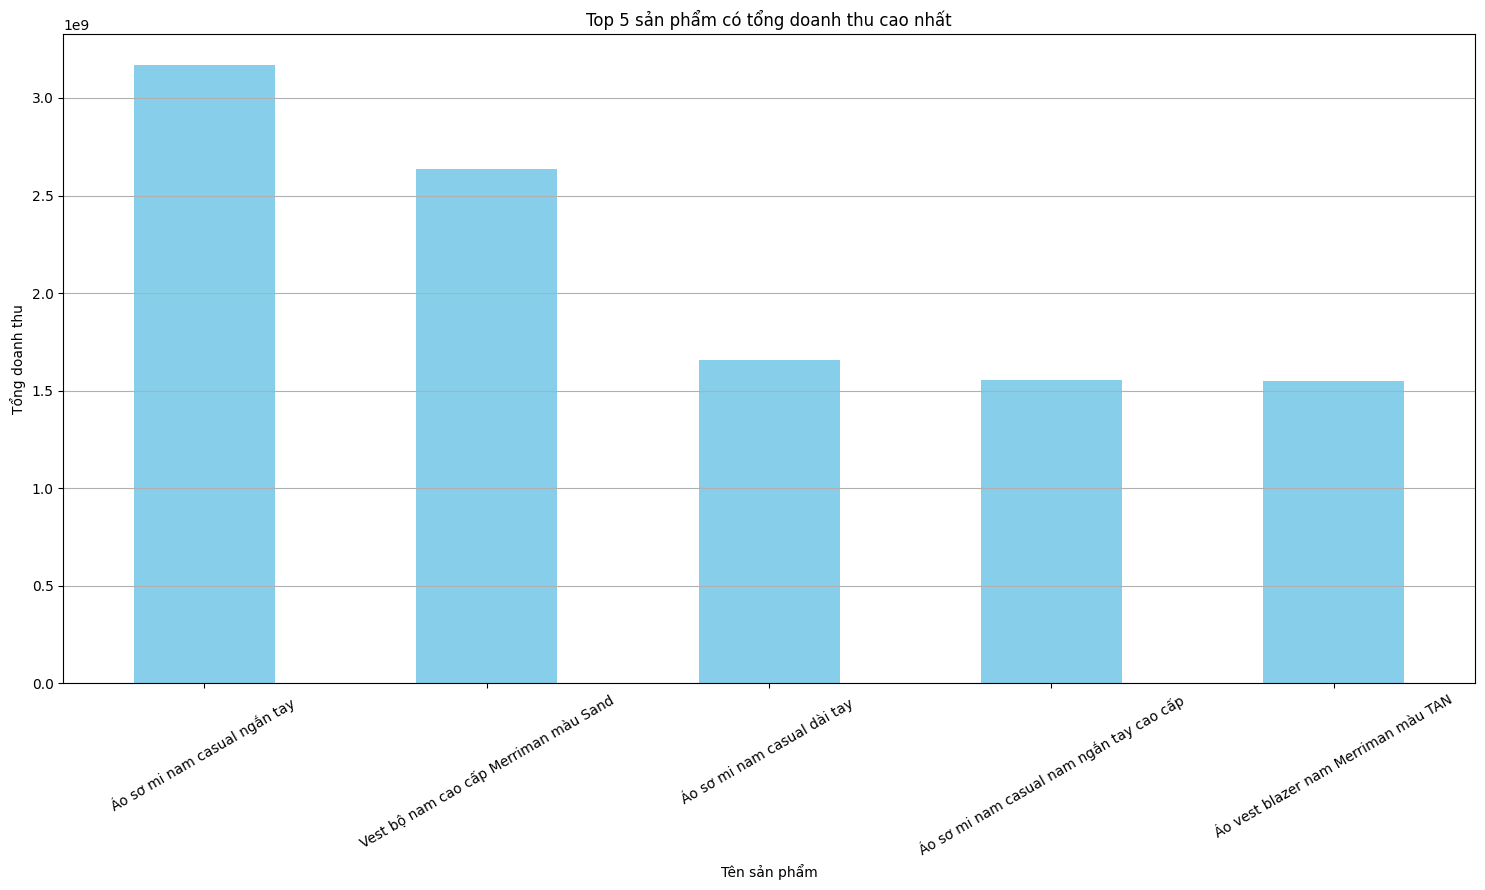

In [41]:
plt.figure(figsize=(15,9))
top_5_high_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 5 sản phẩm có tổng doanh thu cao nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


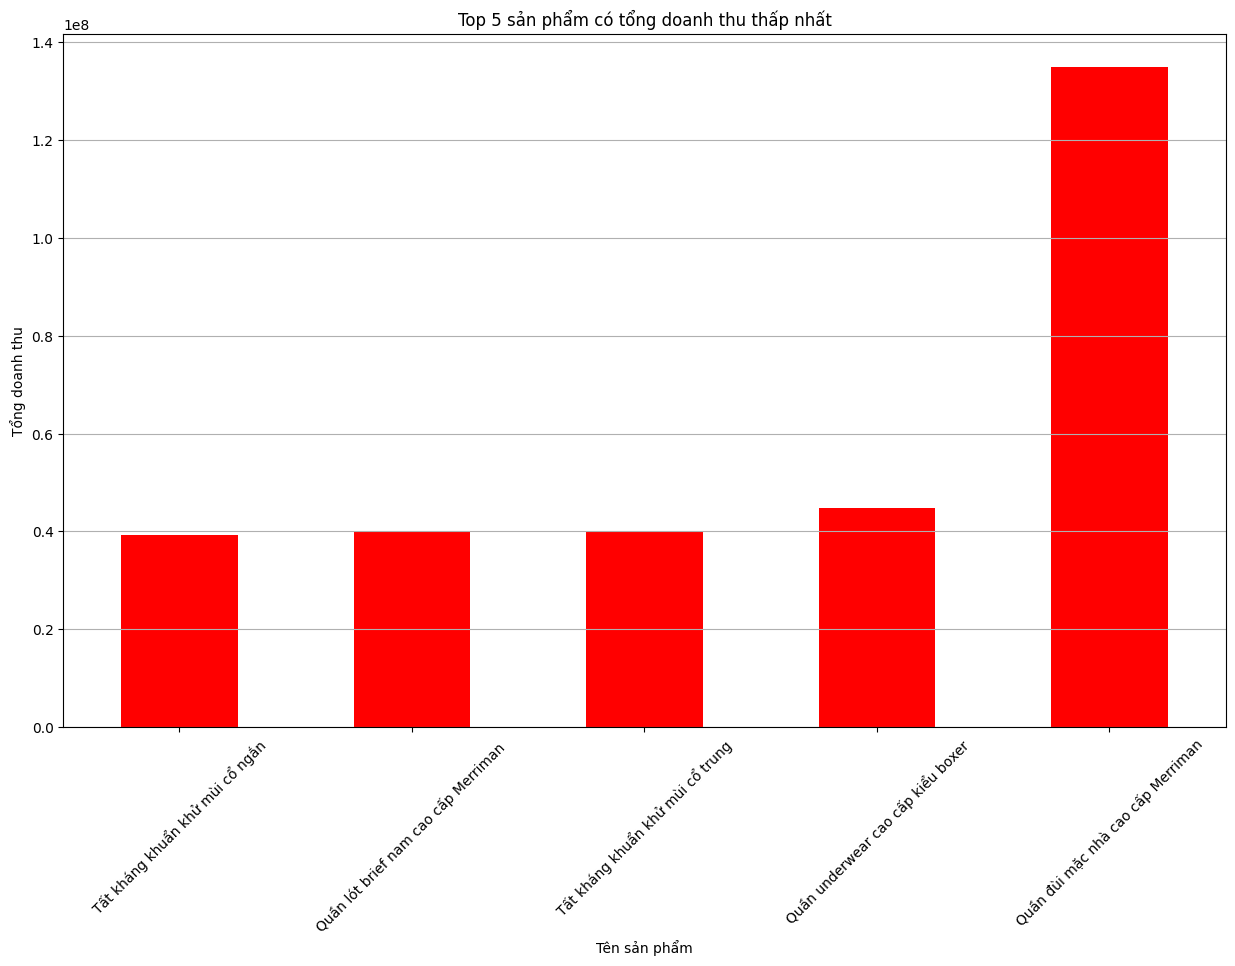

In [42]:
plt.figure(figsize=(15,9))
top_5_low_revenue.plot(kind='bar', color='red')
plt.title('Top 5 sản phẩm có tổng doanh thu thấp nhất')
plt.xlabel('Tên sản phẩm')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout
plt.show()

In [43]:
#Tổng doanh thu theo thời gian
# Lọc dữ liệu cho 6 tháng đầu năm 2022
revenue_first_half_2022 = final_df[(final_df['Year'] == 2022) & (final_df['Month'] <= 6)]['Revenue'].sum()

# Lọc dữ liệu cho 6 tháng cuối năm 2022
revenue_second_half_2022 = final_df[(final_df['Year'] == 2022) & (final_df['Month'] > 6) & (final_df['Month'] <= 12)]['Revenue'].sum()

# Lọc dữ liệu cho 6 tháng đầu năm 2023
revenue_first_half_2023 = final_df[(final_df['Year'] == 2023) & (final_df['Month'] <= 6)]['Revenue'].sum()

print("Tổng doanh thu 6 tháng đầu năm 2022:", revenue_first_half_2022)
print("Tổng doanh thu 6 tháng cuối năm 2022:", revenue_second_half_2022)
print("Tổng doanh thu 6 tháng đầu năm 2023:", revenue_first_half_2023)

Tổng doanh thu 6 tháng đầu năm 2022: 47733264528
Tổng doanh thu 6 tháng cuối năm 2022: 18462661339
Tổng doanh thu 6 tháng đầu năm 2023: 29412466856


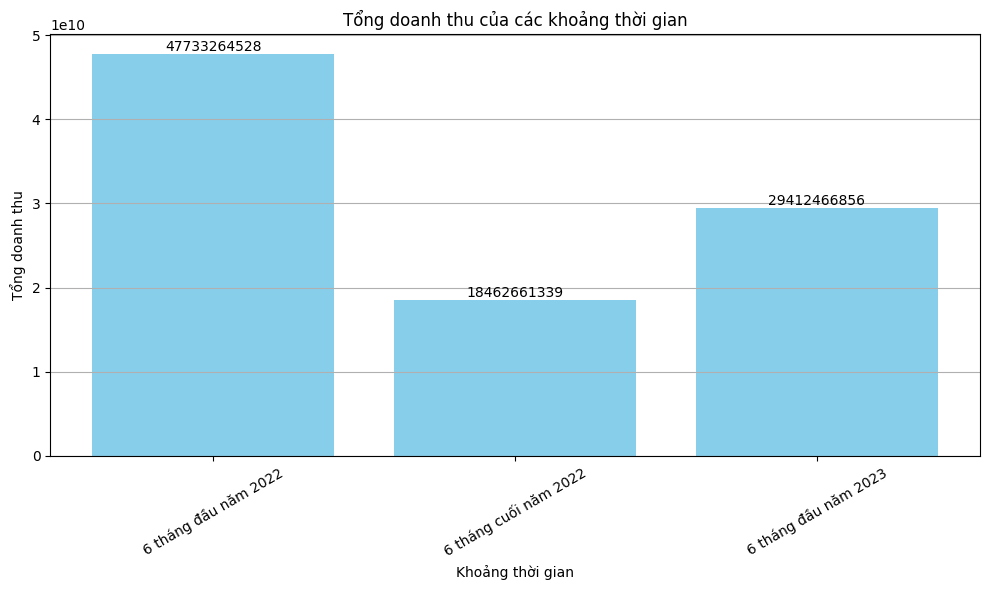

In [44]:
periods = ['6 tháng đầu năm 2022', '6 tháng cuối năm 2022', '6 tháng đầu năm 2023']
revenues = [revenue_first_half_2022, revenue_second_half_2022, revenue_first_half_2023]

plt.figure(figsize=(10, 6))
bars = plt.bar(periods, revenues, color='skyblue')

for bar, revenue in zip(bars, revenues):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')

plt.title('Tổng doanh thu của các khoảng thời gian')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

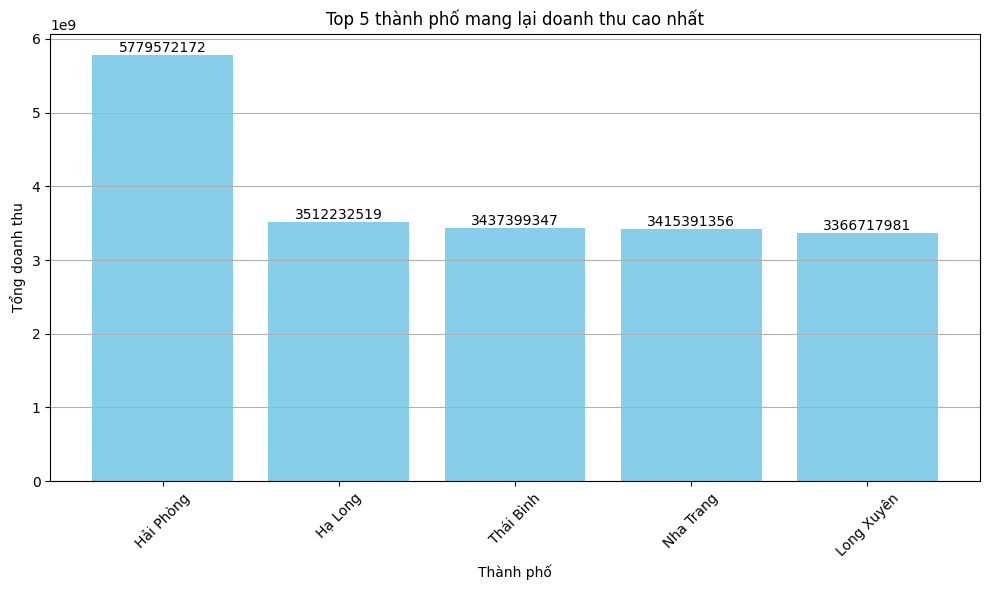

In [45]:
#Top 5 thành phố có doanh thu cao nhất
city_revenue = final_df.groupby('City')['Revenue'].sum()
top_5_city_revenue = city_revenue.nlargest(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_city_revenue.index, top_5_city_revenue.values, color='skyblue')

for bar, revenue in zip(bars, top_5_city_revenue.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{revenue:.0f}', ha='center', va='bottom')

plt.title('Top 5 thành phố mang lại doanh thu cao nhất')
plt.xlabel('Thành phố')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

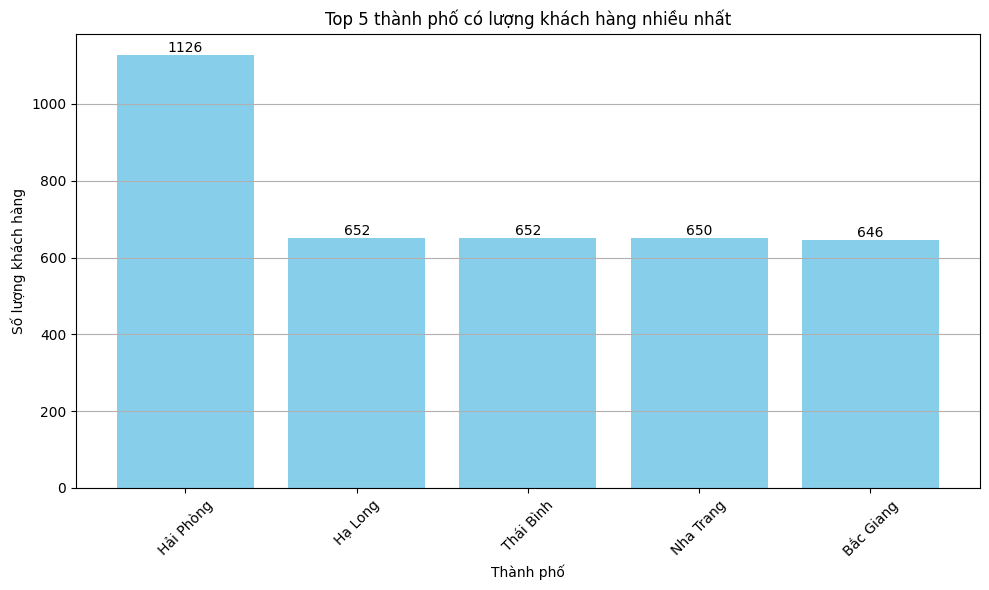

In [46]:
#Top 5 thành phố có lượng khách nhiều nhất
city_customers = final_df.groupby('City')['Customer_ID'].nunique()

top_5_city_customers = city_customers.nlargest(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_city_customers.index, top_5_city_customers.values, color='skyblue')

for bar, customers in zip(bars, top_5_city_customers.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{customers}', ha='center', va='bottom')

plt.title('Top 5 thành phố có lượng khách hàng nhiều nhất')
plt.xlabel('Thành phố')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

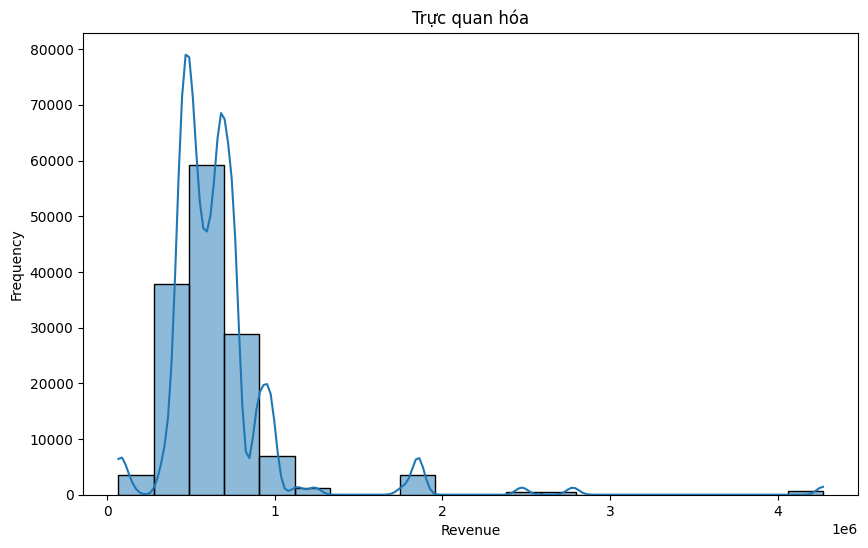

In [47]:
#Trực quan hóa
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Revenue'], bins=20, kde = True)
plt.title('Trực quan hóa')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

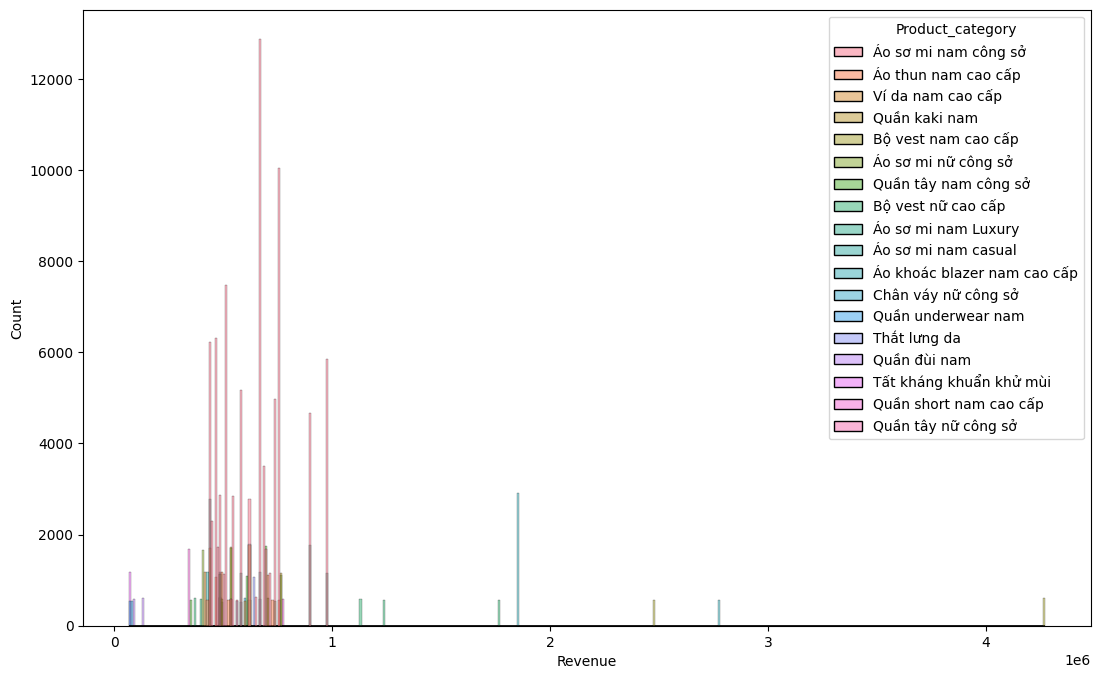

In [48]:
#Tách theo giá trị của cột 'Product_category', nghĩa là mỗi nhóm 'Product_category' sẽ có một histogram riêng, hiển thị phân phối của 'Revenue' trong nhóm đó.
plt.figure(figsize=(13,8))
sns.histplot(x=final_df['Revenue'], hue=final_df['Product_category']);


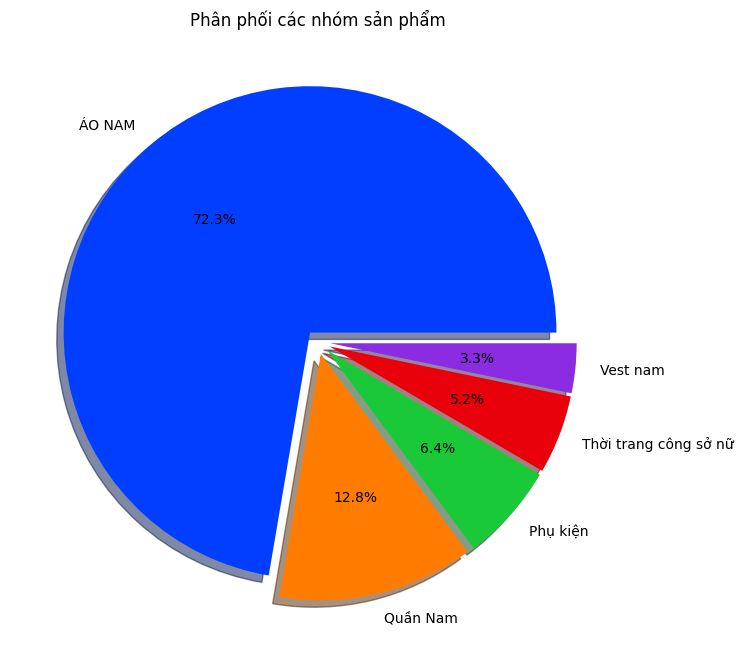

In [49]:
#Phân phối các nhóm sản phẩm
explode = [0.05] * len(final_df['Product_group'].unique())

final_df['Product_group'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(8, 8), colors=sns.color_palette('bright'))
plt.title('Phân phối các nhóm sản phẩm')
plt.ylabel('')  # Loại bỏ nhãn trục y
plt.show()

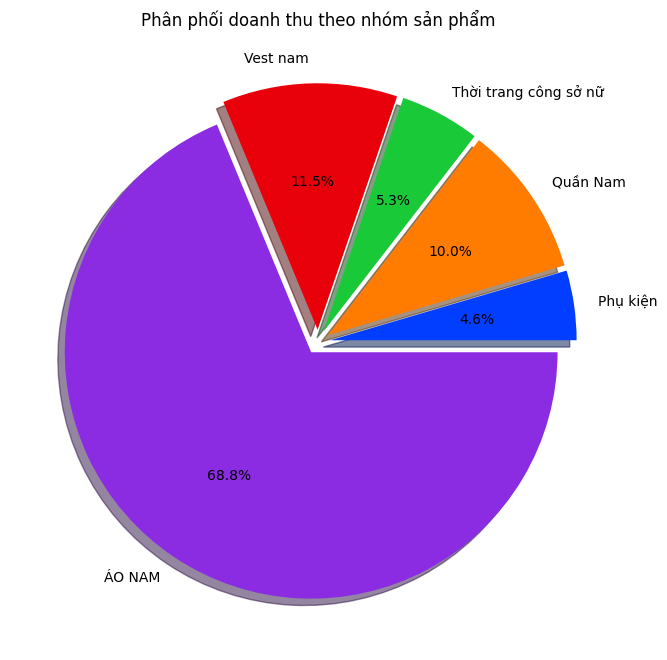

In [50]:
# Tính tổng doanh thu theo từng nhóm sản phẩm
revenue_by_product_group = final_df.groupby('Product_group')['Revenue'].sum()

# Vẽ biểu đồ tròn phân phối doanh thu theo nhóm sản phẩm
explode = [0.05] * len(revenue_by_product_group.unique())

revenue_by_product_group.plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(8, 8), colors=sns.color_palette('bright'))
plt.title('Phân phối doanh thu theo nhóm sản phẩm')
plt.ylabel('')  # Loại bỏ nhãn trục y
plt.show()


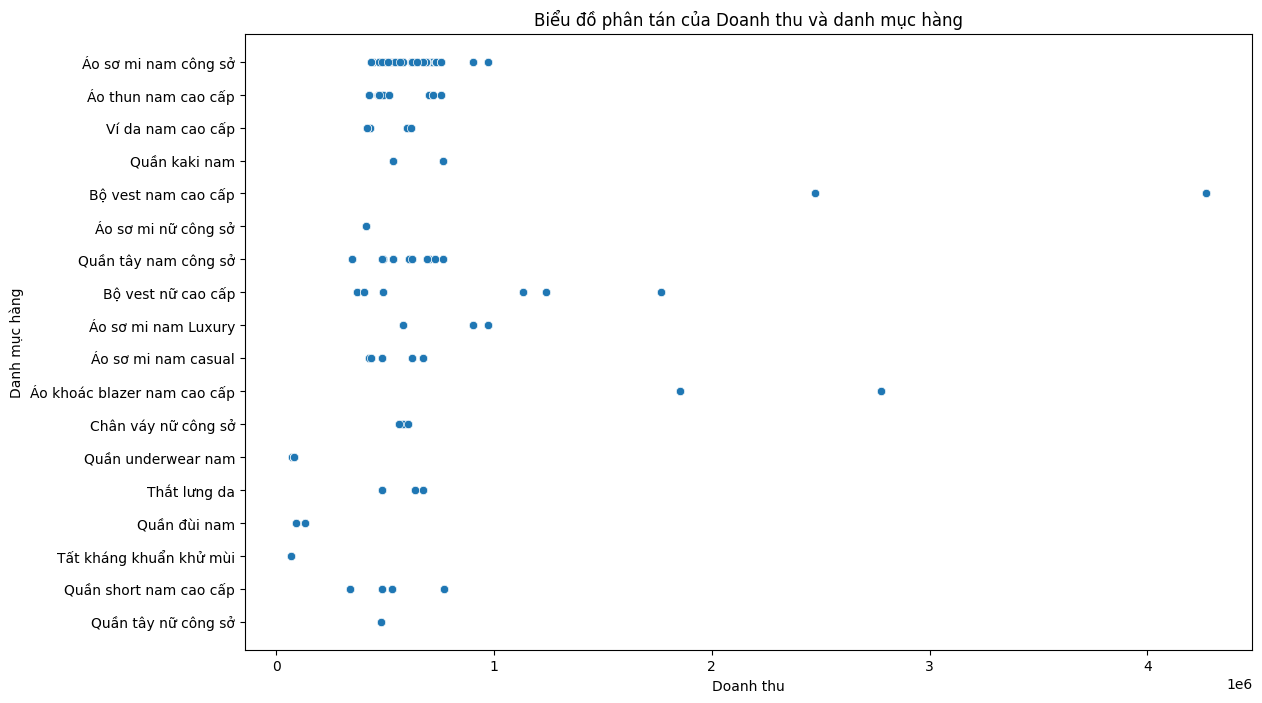

In [51]:
#Biểu đồ phân tán của Doanh thu và danh mục hàng
plt.figure(figsize=(13, 8))
sns.scatterplot(x=final_df['Revenue'], y=final_df['Product_category'])
plt.xlabel('Doanh thu')
plt.ylabel('Danh mục hàng')
plt.title('Biểu đồ phân tán của Doanh thu và danh mục hàng')
plt.show()

In [52]:
#RFM: Recency - Frequency - Monetary Value

In [53]:
#Recency
recency_df = final_df.groupby('Customer_ID')['Order_Date'].max().reset_index()

In [54]:
recency_df

,Customer_ID,Order_Date
0,1,2023-01-29
1,2,2022-01-30
2,3,2023-04-14
3,4,2023-05-17
4,5,2023-01-25
...,...,...
18172,18369,2023-04-26
18173,18370,2023-03-18
18174,18371,2023-04-22
18175,18372,2023-01-28


In [55]:
#Lấy ngày giao dịch gần nhất làm tham chiếu
recency_df['Order_Date'].max()

Timestamp('2023-06-29 00:00:00')

In [56]:
recency_df['Recency'] = (recency_df['Order_Date'].max() - recency_df['Order_Date']).dt.days

In [57]:
recency_df

,Customer_ID,Order_Date,Recency
0,1,2023-01-29,151
1,2,2022-01-30,515
2,3,2023-04-14,76
3,4,2023-05-17,43
4,5,2023-01-25,155
...,...,...,...
18172,18369,2023-04-26,64
18173,18370,2023-03-18,103
18174,18371,2023-04-22,68
18175,18372,2023-01-28,152


In [58]:
#Frequency
frequency_df = final_df.groupby('Customer_ID')['Order_Date'].count().reset_index(name='Frequency')

In [59]:
frequency_df

,Customer_ID,Frequency
0,1,5
1,2,1
2,3,11
3,4,12
4,5,6
...,...,...
18172,18369,6
18173,18370,7
18174,18371,9
18175,18372,7


In [60]:
#Monetary
monetary_df = final_df.groupby('Customer_ID')['Revenue'].sum().reset_index(name='Monetary')

In [61]:
monetary_df

,Customer_ID,Monetary
0,1,2424112
1,2,903273
2,3,6363165
3,4,8080854
4,5,3730909
...,...,...
18172,18369,4017600
18173,18370,8884864
18174,18371,5457438
18175,18372,5042127


In [62]:
rfm_df = pd.merge(recency_df, frequency_df, on = 'Customer_ID')
rfm_df = pd.merge(rfm_df, monetary_df, on = 'Customer_ID')
rfm_df

,Customer_ID,Order_Date,Recency,Frequency,Monetary
0,1,2023-01-29,151,5,2424112
1,2,2022-01-30,515,1,903273
2,3,2023-04-14,76,11,6363165
3,4,2023-05-17,43,12,8080854
4,5,2023-01-25,155,6,3730909
...,...,...,...,...,...
18172,18369,2023-04-26,64,6,4017600
18173,18370,2023-03-18,103,7,8884864
18174,18371,2023-04-22,68,9,5457438
18175,18372,2023-01-28,152,7,5042127


In [63]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

In [64]:
outliers_recency = detect_outliers(rfm_df['Recency'])
outliers_frequency = detect_outliers(rfm_df['Frequency'])
outliers_monetary = detect_outliers(rfm_df['Monetary'])

In [65]:
print("Các giá trị ngoại lai cho Recency:")
print(outliers_recency)
print("\nCác giá trị ngoại lai cho Frequency:")
print(outliers_frequency)
print("\nCác giá trị ngoại lai cho Monetary:")
print(outliers_monetary)

Các giá trị ngoại lai cho Recency:
1        515
15       440
18       499
55       433
56       434
        ... 
18097    495
18104    447
18106    451
18119    493
18140    470
Name: Recency, Length: 2007, dtype: int64

Các giá trị ngoại lai cho Frequency:
12       19
120      18
151      18
232      22
270      19
         ..
18005    19
18053    21
18121    21
18129    18
18151    19
Name: Frequency, Length: 288, dtype: int64

Các giá trị ngoại lai cho Monetary:
12       15475811
57       13794547
134      14391492
179      13576092
188      12880476
           ...   
18000    14920199
18005    14876019
18036    13300201
18053    15701402
18121    12700797
Name: Monetary, Length: 302, dtype: int64


In [66]:
rfm_df = rfm_df[(rfm_df[['Recency', 'Frequency', 'Monetary']] != 0).all(axis=1)]
print("Bảng RFM sau khi loại bỏ giá trị ngoại lai:")
print(rfm_df.head())

Bảng RFM sau khi loại bỏ giá trị ngoại lai:
   Customer_ID Order_Date  Recency  Frequency  Monetary
0            1 2023-01-29      151          5   2424112
1            2 2022-01-30      515          1    903273
2            3 2023-04-14       76         11   6363165
3            4 2023-05-17       43         12   8080854
4            5 2023-01-25      155          6   3730909


In [67]:
rfm_df = rfm_df.drop(columns=['Order_Date'])
rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary
0,1,151,5,2424112
1,2,515,1,903273
2,3,76,11,6363165
3,4,43,12,8080854
4,5,155,6,3730909


In [68]:
rfm_df.describe()

,Customer_ID,Recency,Frequency,Monetary
count,18162.000000,18162.000000,18162.000000,1.816200e+04
mean,9187.156426,133.345336,7.849796,5.259473e+06
std,5306.292671,125.356621,3.903030,2.857906e+06
min,1.000000,1.000000,1.000000,6.676400e+04
25%,4589.250000,59.000000,5.000000,3.161823e+06
50%,9189.500000,101.000000,7.000000,4.888228e+06
75%,13782.750000,146.000000,10.000000,6.936956e+06
max,18373.000000,544.000000,32.000000,2.378543e+07


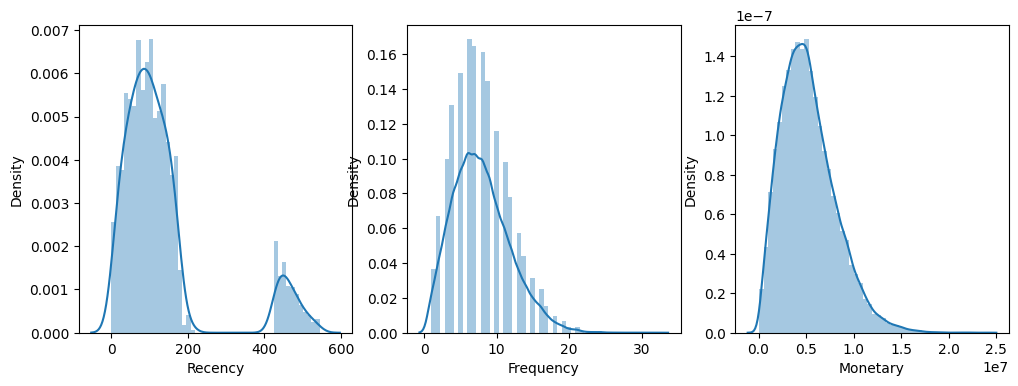

In [69]:
#Vẽ phân phối để kiểm tra
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.distplot(rfm_df['Recency'], ax=ax[0])
sns.distplot(rfm_df['Frequency'], ax=ax[1])
sns.distplot(rfm_df['Monetary'], ax=ax[2])
plt.show()

In [70]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize = (5,5))
    sns.distplot(rfm_df[x], ax=ax[0,0])
    sns.distplot(np.log(rfm_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(rfm_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(rfm_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(rfm_df[x].skew().round(2))
    print(np.log(rfm_df[x]).skew().round(2))
    print(np.sqrt(rfm_df[x]).skew().round(2))
    print(pd.Series(stats.boxcox(rfm_df[x])[0]).skew().round(2))


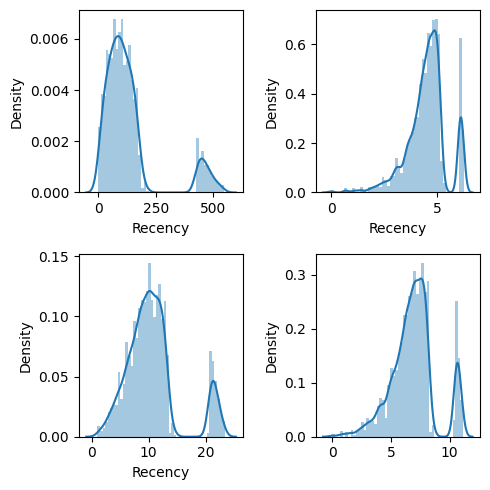

1.94
-0.68
1.07
0.04


In [71]:
analyze_skewness('Recency')

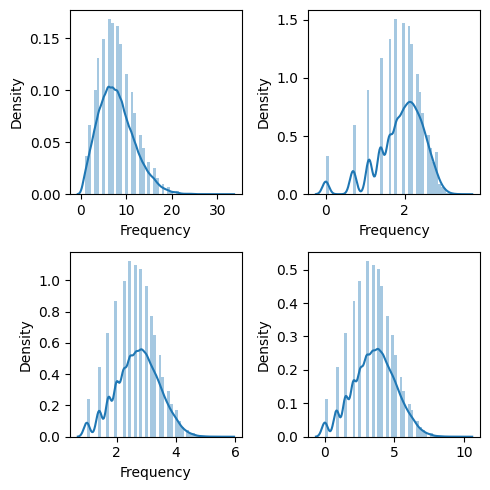

0.64
-0.94
-0.08
-0.03


In [72]:
analyze_skewness('Frequency')

In [73]:
#Transform dữ liệu
rfm_df_t = pd.DataFrame()
rfm_df_t['Recency_Boxcox'] = stats.boxcox(rfm_df['Recency'])[0]
rfm_df_t['Frequency_Boxcox'] = stats.boxcox(rfm_df['Frequency'])[0]
rfm_df_t['Monetary_Boxcox'] = pd.Series(np.cbrt(rfm_df['Monetary'])).values
rfm_df_t.head()

,Recency_Boxcox,Frequency_Boxcox,Monetary_Boxcox
0,7.843165,2.540557,134.333468
1,10.982598,0.000000,96.665836
2,6.346946,4.836689,185.306674
3,5.229204,5.153942,200.671526
4,7.903595,2.989646,155.097531


In [74]:
rfm_df_t.describe()

,Recency_Boxcox,Frequency_Boxcox,Monetary_Boxcox
count,18162.000000,18162.000000,18162.000000
mean,6.887841,3.550584,167.674354
std,1.902969,1.516499,33.239862
min,0.000000,0.000000,40.567737
25%,5.836923,2.540557,146.772891
50%,6.946039,3.404700,169.713792
75%,7.765721,4.505557,190.717105
max,11.138298,9.952634,287.587711


In [75]:
def calculate_score(value, quantiles):
    if value <= quantiles.loc[0.25]:  # Truy cập bằng nhãn chỉ số
        return 5
    elif value <= quantiles.loc[0.5]:
        return 4
    elif value <= quantiles.loc[0.75]:
        return 3
    elif value <= quantiles.loc[0.9]:
        return 2
    else:
        return 1

In [76]:
# Tính toán quantiles của mỗi biến RFM
recency_quantiles = rfm_df_t['Recency_Boxcox'].quantile([0.25, 0.5, 0.75, 0.9])
frequency_quantiles = rfm_df_t['Frequency_Boxcox'].quantile([0.25, 0.5, 0.75, 0.9])
monetary_quantiles = rfm_df_t['Monetary_Boxcox'].quantile([0.25, 0.5, 0.75, 0.9])
print("Quantiles cho Recency_Boxcox, Frequency_Boxcox và Monetary_Boxcox:")
print(f"Recency_Boxcox quantiles:\n{recency_quantiles}")
print(f"Frequency_Boxcox quantiles:\n{frequency_quantiles}")
print(f"Monetary_Boxcox quantiles:\n{monetary_quantiles}")

Quantiles cho Recency_Boxcox, Frequency_Boxcox và Monetary_Boxcox:
Recency_Boxcox quantiles:
0.25     5.836923
0.50     6.946039
0.75     7.765721
0.90    10.486230
Name: Recency_Boxcox, dtype: float64
Frequency_Boxcox quantiles:
0.25    2.540557
0.50    3.404700
0.75    4.505557
0.90    5.458990
Name: Frequency_Boxcox, dtype: float64
Monetary_Boxcox quantiles:
0.25    146.772891
0.50    169.713792
0.75    190.717105
0.90    208.966841
Name: Monetary_Boxcox, dtype: float64


In [77]:
# Tính Recency_Score dựa trên Recency_Boxcox
rfm_df_t['Recency_Score'] = rfm_df_t['Recency_Boxcox'].apply(lambda x: calculate_score(x, recency_quantiles))
# In bảng dữ liệu với điểm Recency đã được tính toán
print("Bảng RFM với điểm Recency được tính toán theo Recency_Boxcox:")
print(rfm_df_t.head())

Bảng RFM với điểm Recency được tính toán theo Recency_Boxcox:
   Recency_Boxcox  Frequency_Boxcox  Monetary_Boxcox  Recency_Score
0        7.843165          2.540557       134.333468              2
1       10.982598          0.000000        96.665836              1
2        6.346946          4.836689       185.306674              4
3        5.229204          5.153942       200.671526              5
4        7.903595          2.989646       155.097531              2


In [78]:
rfm_df_t['Frequency_Score'] = pd.qcut(rfm_df_t['Frequency_Boxcox'], q=5, labels=[1, 2, 3, 4, 5])
rfm_df_t['Monetary_Score'] = pd.qcut(rfm_df_t['Monetary_Boxcox'], q=5, labels=[1, 2, 3, 4, 5])
print("Bảng RFM với điểm Frequency và Monetary được tính toán:")
print(rfm_df_t.head())

Bảng RFM với điểm Frequency và Monetary được tính toán:
   Recency_Boxcox  Frequency_Boxcox  Monetary_Boxcox  Recency_Score  \
0        7.843165          2.540557       134.333468              2   
1       10.982598          0.000000        96.665836              1   
2        6.346946          4.836689       185.306674              4   
3        5.229204          5.153942       200.671526              5   
4        7.903595          2.989646       155.097531              2   

  Frequency_Score Monetary_Score  
0               2              1  
1               1              1  
2               4              4  
3               5              5  
4               2              2  


In [79]:
# Tính toán ma trận tương quan giữa các biến RFM
correlation_matrix = rfm_df_t[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].corr()
print("Ma trận tương quan giữa các biến RFM:")
print(correlation_matrix)

Ma trận tương quan giữa các biến RFM:
                 Recency_Score  Frequency_Score  Monetary_Score
Recency_Score         1.000000         0.504661        0.464846
Frequency_Score       0.504661         1.000000        0.893647
Monetary_Score        0.464846         0.893647        1.000000


In [80]:
# Tính toán trọng số quan trọng dựa trên tổng của ma trận tương quan
weights = correlation_matrix.sum() / correlation_matrix.sum().sum()
print("Trọng số của các biến RFM:")
print(weights)

Trọng số của các biến RFM:
Recency_Score      0.292807
Frequency_Score    0.356556
Monetary_Score     0.350637
dtype: float64


In [81]:
#chuyển đổi kiểu dữ liệu thành kiểu int
rfm_df_t['Frequency_Score'] = rfm_df_t['Frequency_Score'].astype(int)
rfm_df_t['Monetary_Score'] = rfm_df_t['Monetary_Score'].astype(int)

In [82]:
# Tính toán RFM_Score sử dụng các trọng số vừa tính được
rfm_df_t['RFM_Score'] = (weights['Recency_Score'] * rfm_df_t['Recency_Score'] +
                       weights['Frequency_Score'] * rfm_df_t['Frequency_Score'] +
                       weights['Monetary_Score'] * rfm_df_t['Monetary_Score'])
rfm_df_t['RFM_Score'] = rfm_df_t['RFM_Score'].round(2)
print("Bảng RFM với điểm RFM_Score được tính toán:")
print(rfm_df_t.head())

Bảng RFM với điểm RFM_Score được tính toán:
   Recency_Boxcox  Frequency_Boxcox  Monetary_Boxcox  Recency_Score  \
0        7.843165          2.540557       134.333468              2   
1       10.982598          0.000000        96.665836              1   
2        6.346946          4.836689       185.306674              4   
3        5.229204          5.153942       200.671526              5   
4        7.903595          2.989646       155.097531              2   

   Frequency_Score  Monetary_Score  RFM_Score  
0                2               1       1.65  
1                1               1       1.00  
2                4               4       4.00  
3                5               5       5.00  
4                2               2       2.00  


In [83]:
def get_customer_type(score):
    if 1 <= score < 2:
        return 'Khách hàng vãng lai'
    elif 2 <= score < 3:
        return 'Khách hàng tiềm năng'
    elif 3 <= score < 4:
        return 'Khách hàng trung thành'
    elif 4 <= score <= 5:
        return 'Khách hàng VIP'
    else:
        return 'N/A'

In [84]:
# Gán nhãn phân khúc khách hàng dựa trên RFM_Score
rfm_df_t['Customer_Segment'] = rfm_df_t['RFM_Score'].apply(lambda x: get_customer_type(x))
print("Phân khúc khách hàng cuối cùng dựa trên RFM_Score:")
print(rfm_df_t.head())

Phân khúc khách hàng cuối cùng dựa trên RFM_Score:
   Recency_Boxcox  Frequency_Boxcox  Monetary_Boxcox  Recency_Score  \
0        7.843165          2.540557       134.333468              2   
1       10.982598          0.000000        96.665836              1   
2        6.346946          4.836689       185.306674              4   
3        5.229204          5.153942       200.671526              5   
4        7.903595          2.989646       155.097531              2   

   Frequency_Score  Monetary_Score  RFM_Score      Customer_Segment  
0                2               1       1.65   Khách hàng vãng lai  
1                1               1       1.00   Khách hàng vãng lai  
2                4               4       4.00        Khách hàng VIP  
3                5               5       5.00        Khách hàng VIP  
4                2               2       2.00  Khách hàng tiềm năng  


In [88]:
merged_df = pd.merge(rfm_df, rfm_df_t, on='Customer_ID', how='inner')

In [87]:
rfm_df_t['Customer_ID'] = rfm_df['Customer_ID']

In [89]:
merged_df['Customer_Type'] = merged_df['RFM_Score'].apply(get_customer_type)

In [90]:
print(merged_df.head())

   Customer_ID  Recency  Frequency  Monetary  Recency_Boxcox  \
0            1      151          5   2424112        7.843165   
1            2      515          1    903273       10.982598   
2            3       76         11   6363165        6.346946   
3            4       43         12   8080854        5.229204   
4            5      155          6   3730909        7.903595   

   Frequency_Boxcox  Monetary_Boxcox  Recency_Score  Frequency_Score  \
0          2.540557       134.333468              2                2   
1          0.000000        96.665836              1                1   
2          4.836689       185.306674              4                4   
3          5.153942       200.671526              5                5   
4          2.989646       155.097531              2                2   

   Monetary_Score  RFM_Score      Customer_Segment         Customer_Type  
0               1       1.65   Khách hàng vãng lai   Khách hàng vãng lai  
1               1       1.00   K

In [91]:
#Trực quan hóa
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [93]:
merged_df = merged_df[merged_df['Customer_Type'] != 'N/A']
label_counts = merged_df['Customer_Type'].value_counts()

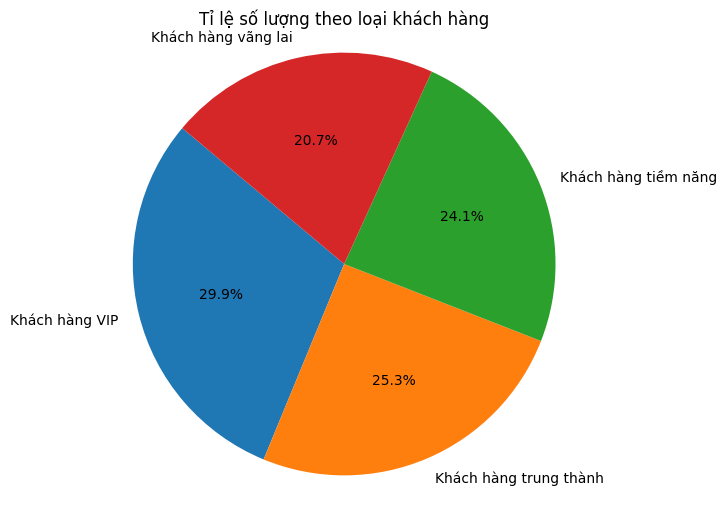

In [95]:
label_counts = merged_df['Customer_Type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ số lượng theo loại khách hàng')
plt.axis('equal')
plt.show()

In [98]:
merged_df = merged_df[(merged_df[['Recency_Score', 'Frequency_Score', 'Monetary_Score']] != 0).all(axis=1)]

In [99]:
merged_df.describe()

,Customer_ID,Recency,Frequency,Monetary,Recency_Boxcox,Frequency_Boxcox,Monetary_Boxcox,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
count,18147.000000,18147.000000,18147.000000,1.814700e+04,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,9179.569350,133.373120,7.849452,5.259280e+06,6.887528,3.551115,167.682301,3.409048,2.954648,3.000220,3.103698
std,5301.916171,125.398095,3.903616,2.858569e+06,1.902761,1.516428,33.236271,1.277505,1.389599,1.414175,1.195700
min,1.000000,1.000000,1.000000,6.676400e+04,0.000000,0.000000,40.567737,1.000000,1.000000,1.000000,1.000000
25%,4585.500000,59.000000,5.000000,3.161455e+06,5.836923,2.540557,146.820334,3.000000,2.000000,2.000000,2.170000
50%,9181.000000,101.000000,7.000000,4.886018e+06,6.946039,3.404700,169.722326,4.000000,3.000000,3.000000,3.230000
75%,13771.500000,146.000000,10.000000,6.937282e+06,7.765721,4.505557,190.720097,5.000000,4.000000,4.000000,4.060000
max,18358.000000,544.000000,32.000000,2.378543e+07,11.138298,9.952634,287.587711,5.000000,5.000000,5.000000,5.000000


In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       18147 non-null  int64  
 1   Recency           18147 non-null  int64  
 2   Frequency         18147 non-null  int64  
 3   Monetary          18147 non-null  int64  
 4   Recency_Boxcox    18147 non-null  float64
 5   Frequency_Boxcox  18147 non-null  float64
 6   Monetary_Boxcox   18147 non-null  float64
 7   Recency_Score     18147 non-null  int64  
 8   Frequency_Score   18147 non-null  int64  
 9   Monetary_Score    18147 non-null  int64  
 10  RFM_Score         18147 non-null  float64
 11  Customer_Segment  18147 non-null  object 
 12  Customer_Type     18147 non-null  object 
dtypes: float64(4), int64(7), object(2)
memory usage: 1.8+ MB
